# $🧑‍💻 Author :- Prince Kumar Sharma$

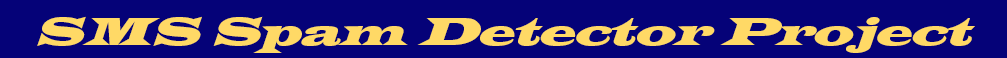

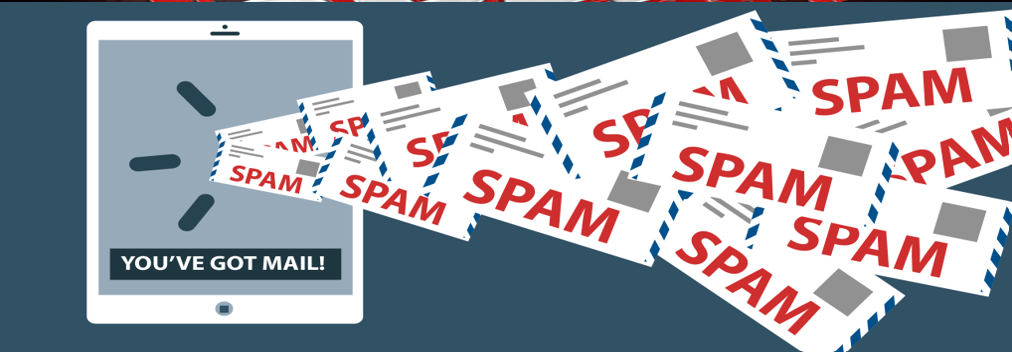

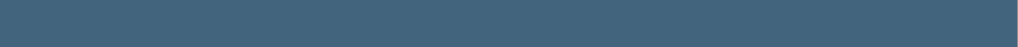

# $🧐 What is Spam Messages ❓$
Spam messages are unsolicited, usually commercial messages sent to a large number of recipients or posted in a large number of places. They can be sent via email, text messages, phone calls, or social media. Spam messages often contain advertising content, scare tactics, or requests for personal information. Spam messages may also contain malware or links to malicious websites
##  $ (OR) 🤷‍♂️$
Email spam, also referred to as junk email, spam mail, or simply spam, is unsolicited messages sent in bulk by email (spamming). The name comes from a Monty Python sketch in which the name of the canned pork product Spam is ubiquitous, unavoidable, and repetitive. 
# $ 🧐 What .is Ham Messages ❓$
* E-mail that is generally desired and isn't considered spam.
* If it should happen that a message has been blocked by mistake, you can report it as non-spam (HAM). For this purpose, we have included a "not-spam report"function in our filter, which you can use to send us messages in EML or MSG format. The messages are then used to train our filter and further improve spam detection.
## $(OR) 🤷‍♂️$
the use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.”  This is a commonly accepted definition in the industry, though there are variations in how governments define and regulate spam.  For example, in the United States, any commercial email has to comply with Spam regulations, even if the email is not sent in bulk

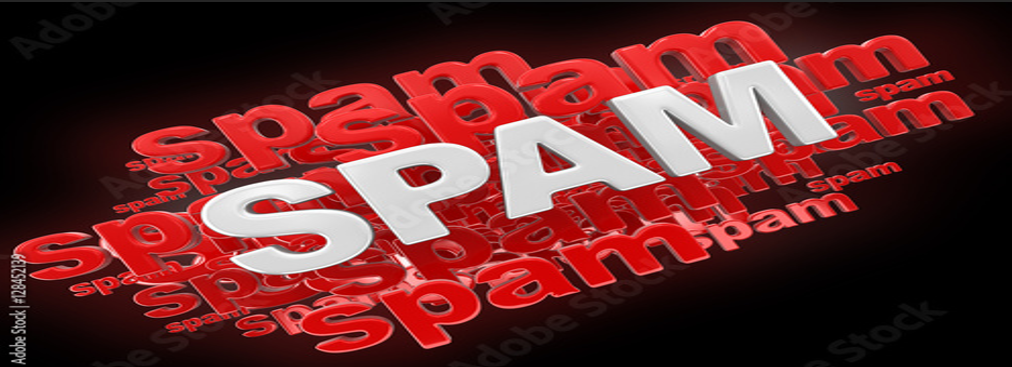

# $🪶 Importing Usefull python Library$
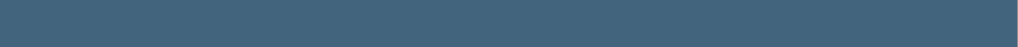

In [74]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [76]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [77]:
df.shape

(5572, 5)

# $🪶 My- work$

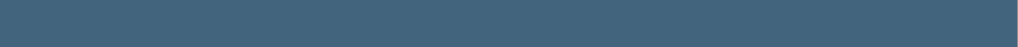
### $💡Data Cleaning$
### $💡EDA$
### $💡Text Preprocessing$
### $💡Model Building$
### $💡Evalutation$
### $💡Implement$
### $💡Website$
### $💡Deploy$



# $💡1.🛠  Data Cleaning$
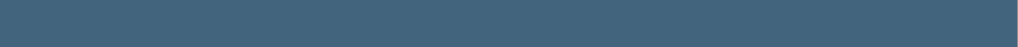

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [79]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [80]:
#drop last three columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [81]:
# first of all we have to rename the Columns 
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [82]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
ln=LabelEncoder()
df["Target"]=ln.fit_transform(df["Target"])

In [85]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
# Missing Value
df.isna().sum()

Target    0
Text      0
dtype: int64

In [87]:
# check the duplicate value
df.duplicated().sum()

403

In [88]:
# remove the duplicate value
df.drop_duplicates(keep="first",inplace=True)

In [89]:
df.duplicated().sum()

0

In [90]:
df.shape

(5169, 2)

# $💡2. Exploratory Data Analysis📉📊(EDA)$
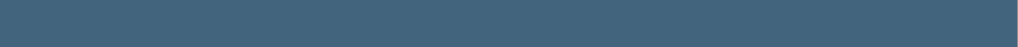

In [91]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df.Target.value_counts()


0    4516
1     653
Name: Target, dtype: int64

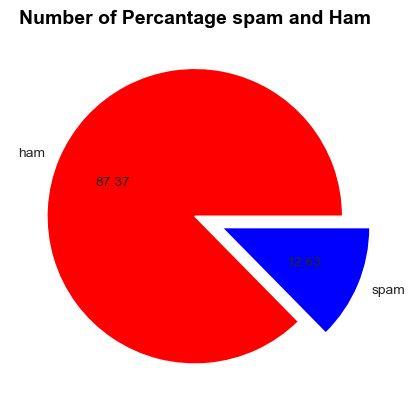

In [93]:
plt.pie(df.Target.value_counts(),labels=["ham","spam"],autopct="%0.2f",colors=["red","blue"],explode=[0,0.2])
plt.title("Number of Percantage spam and Ham",fontweight="bold",fontsize=14,color="black")
plt.show()

### $🛠️Data is imbalanced🛠️$
* =====================================================================================================================
1. 💡 Here We can see that our Target variable completely imbalanced.
2. 💡 According to this pie chart there is 87% data is ham and 13% data is spam so there is big difference.
3. 💡 The Target varibale in when i will Apply Machine Learning Model it will chance to get over fitting
* =====================================================================================================================

In [94]:
import nltk

In [95]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Prince
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# checking the Number of charactor in text Messages
df["No.of Charactor"]=df["Text"].apply(len)

In [97]:
df.head()

,Target,Text,No.of Charactor
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [98]:
# Number of Words
df["Text"].apply(lambda x:len(x.split()))[0]

20

##   (  OR  )

* 🪶 HERE I AM GOING TO USE NATURAL LANGUAGE TOOKKIT TO seperate the each WORD from text messsages.
* 🪶 After counting the Number of words with the help of the length function.

In [99]:
# nltk.word_tokenize is used to find the length of word  from the text masseges
WORDS=df["Text"].apply(lambda x:nltk.word_tokenize(x))

In [100]:
len(WORDS)

5169

In [101]:
df["No.of Words"]=WORDS.apply(lambda x:len(x))

In [102]:
# split() function and nltk.tokenize are work similarly to seperate the each words

In [103]:
df.head()

,Target,Text,No.of Charactor,No.of Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [104]:
# Now i am going to find the Number of sentences from the text messages.


In [105]:
# with the help of the nltk.sent_tokenize we can seperate the senetence from the text messages.

In [106]:
df["Text"].apply(lambda x:len(x.split(",")))[0:3]


0    2
1    1
2    1
Name: Text, dtype: int64

In [107]:
sent=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

🧐 I am getting few Difference between the Normal sentense splitting and nltk.sent_tokenize, so i will go with nltk.

In [108]:
df["No.of Sentences"]=sent

In [109]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [110]:
df.shape

(5169, 5)

## 📊Now i am checking the statistical formulae
* ==================================================================================================

In [111]:
df[["No.of Charactor","No.of Words","No.of Sentences"]].describe()

,No.of Charactor,No.of Words,No.of Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000



# 🪶🪶 Insights :-
* ===============================================================================================================
1. Here we can see that there is a message whose No.of charactor is 910 that is maximum to each other messages
2. And Minimum 2 charactor of messages are there. which is very less.
3. The Average Number of Charactors in our dataset is 78.97 it means round 79.
4. Number of words and Number of Sentences all are similar to Number of charactors.
* ===============================================================================================================

## 💡💡we can do analyze to extract the ham and spam one by one
* ♨️  0 for ham 
* ♨️  1 for spam
* =======================================================================================================
##  ⌛Ham


In [112]:
df[df["Target"]==0][["No.of Charactor","No.of Words","No.of Sentences"]].describe()

,No.of Charactor,No.of Words,No.of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000



# 🪶🪶 Insights :-
* ===============================================================================================================
1. �💡 Here we can see that there is a message whose No.of charactor is 910 that is maximum to each other messages
2. �💡 And Minimum 2 charactor of messages are there. which is very less.
3. �💡 The Average Number of Charactors in our dataset is 78.97 it means round 79.
4. �💡 Number of words and Number of Sentences all are similar to Number of charactors.
5. �💡 with the Hep of this describe function i can understand that when Number of charactor is on average is 70 to 80 than text messages is ham.
* ===============================================================================================================

## ⌛ Spam

In [113]:
df[df["Target"]==1][["No.of Charactor","No.of Words","No.of Sentences"]].describe()

,No.of Charactor,No.of Words,No.of Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000



# 🪶🪶 Insights :-
* ===============================================================================================================
1. �💡 Here we can see that there is a message whose No.of charactor is 224 that is maximum to each other messages
2. �💡And Minimum 13 charactor of messages are there. which is very less.
3. �💡The Average Number of Charactors in our dataset is 137.97 it means round 138.
4. �💡Number of words and Number of Sentences all are similar to Number of charactors.
5. �💡  The spam messages is looks Averages number of charactor is very high so i think that it's show spam.
* ===============================================================================================================

In [114]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# 🪶🪶🪶🪶
## Now Creating the Histogram and visulizing the ham and spam messages
* ===============================================================================================================

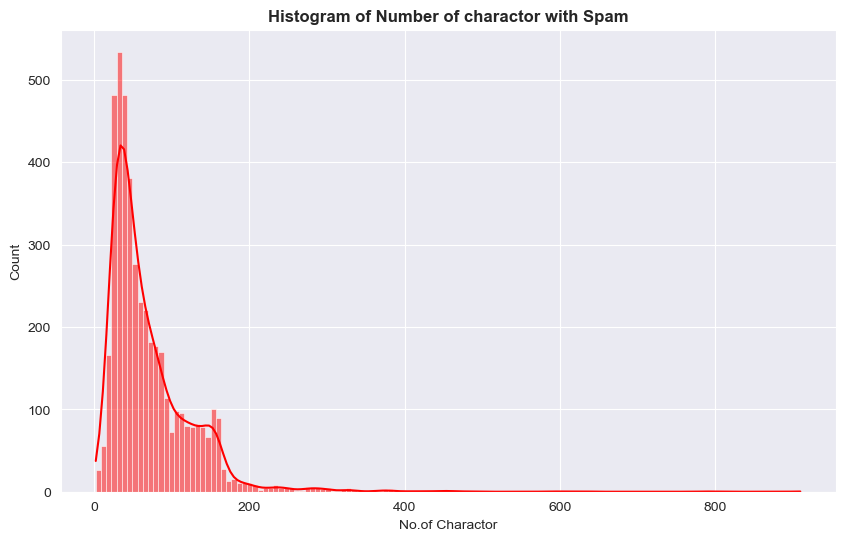

In [115]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.histplot(df[df["Target"]==0]["No.of Charactor"],kde=True,color="red")
plt.xscale("linear")
plt.title("Histogram of Number of charactor with Spam",fontweight="bold")
plt.show()

# $🪶🪶 Insights:$ 
* ===============================================================================================================
1. 💡Here is Most of the Number of Charactor is lies between 20 and 150.
2. 💡Our data is left skewed.
* ===============================================================================================================

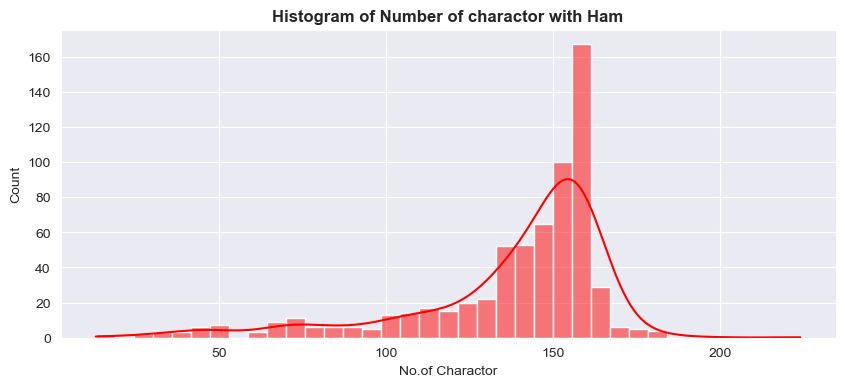

In [116]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.histplot(df[df["Target"]==1]["No.of Charactor"],kde=True,color="red")
plt.xscale("linear")
plt.title("Histogram of Number of charactor with Ham",fontweight="bold")
plt.show()

#  $🪶🪶 Insights$
* ===============================================================================================================
1. 💡The messages is Ham where Maximum Number of charactor lies between 110 and 180.
2. 💡Here we can see that Ham messages is follow the Normal Distribution.
3. 💡According to this Histogram we can say that its follow the emprical Rule.
* ===============================================================================================================

In [117]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


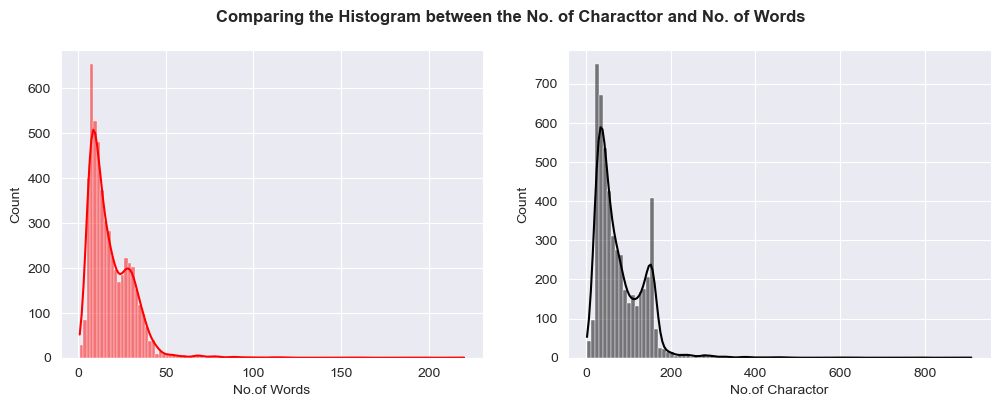

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x="No.of Words",kde=True,color="red")
plt.subplot(1,2,2)
sns.histplot(data=df,x="No.of Charactor",kde=True,color="black")
plt.suptitle("Comparing the Histogram between the No. of Characttor and No. of Words",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡 According to this Histogram both COlumns are highly co-related to each other.
2. 💡 There Both data are highly left skewed. It means our data is Not Normarlly distributed.
3. 💡 In this graph its hsoe that Number of word between the 5 to 50. that is left skewed.
4. 💡 Maximum Number of Charactor are between the 10 and 180 it means.
* ==========================================================================================

In [119]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


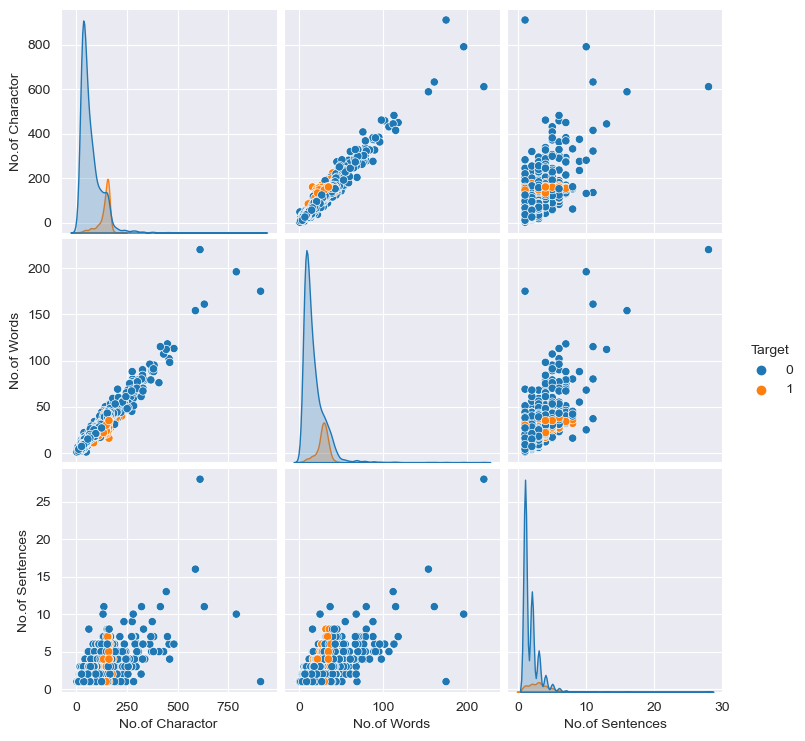

In [120]:
sns.pairplot(df,hue="Target",);

# $🪶 Insights :-$
* ==========================================================================================
1. 💡 According to this pairplot all Columns are highly co-related to each other.
2. 💡 There Both data are highly left skewed. It means our data is Not Normarlly distributed.
3. 💡 In this graph its hsoe that Number of word between the 5 to 50. that is left skewed.
4. 💡 Maximum Number of Charactor are between the 10 and 180 it means.
5. 💡 Number of word and Number of charctor are highly co-related.
6. 💡 There is a big difference between the Ham Messages and spam Messages.
* ==========================================================================================

In [121]:
df.tail()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [122]:
# Checking the Correlation between each other 
df.corr()

,Target,No.of Charactor,No.of Words,No.of Sentences
Target,1.000000,0.384717,0.262984,0.284901
No.of Charactor,0.384717,1.000000,0.965770,0.638143
No.of Words,0.262984,0.965770,1.000000,0.684541
No.of Sentences,0.284901,0.638143,0.684541,1.000000


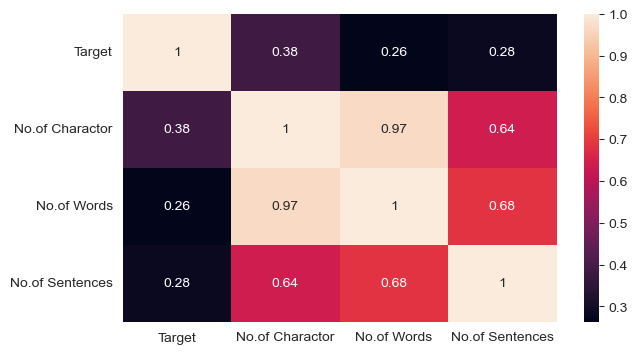

In [123]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡 There Both data are highly left skewed. It means our data is Not Normarlly distributed.
2. 💡 Our Target Variable Not Much co-related to independent variable.
3. 💡 With the help of this heatmap i can easyily understand that which variable are co-related and which not.
* ==========================================================================================

In [124]:
df.tail()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


# $⌛ Data Preprocessing$

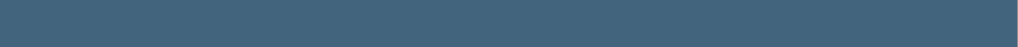
* Lower Case
* Tokenization
* Removing special charactor
* Removing stop words and punctuation
* Stemming
* ===============================================================================================================

In [125]:
# with the help of this Library we can remove the stop word  (ex:- is are,he,she,was,have etc....)
from nltk.corpus import stopwords
#stopwords.words("english") # you check the stop word
import string
#string.punctuation    # its show the all special charactor
from nltk.stem.porter import PorterStemmer


In [126]:
pc=PorterStemmer()

In [127]:
pc.stem("Learning")

'learn'

In [128]:
def transform_text(text):
    # This code convert the strings into lower case
    text = text.lower()
    # This code split the strings into each word with the help of nltk.word_tokenize(text)
    text = nltk.word_tokenize(text)

    L=[]
    # Using the For Loop to iterate the text
    for i in text:
        # this code is used to remove the Special Charactor from the text
        # isalnum :- it is alpha Numeric Number
        if i.isalnum(): #if text is Alpha numeric then print there is any special charactor than remove.
            L.append(i)
    text=L[:]
    L.clear()
    
    for i in text:
        # this code show the if there is any stop word and any special charactor in this text than remove special charactor
        if i not in stopwords.words("english") and i not in string.punctuation:
            L.append(i)
    text=L[:]
    L.clear()
    for i in text:
        # This code bascically stemming the strings (ex: "Learning"->"learn")
        L.append(pc.stem(i))
    return " ".join(L)

In [129]:
# testing with the Easy strings
transform_text("Hii This Is $##456 Prince")

'hii 456 princ'

In [130]:
transform_text("Hii my Name is Prince Kumar sharma %20")

'hii name princ kumar sharma 20'

In [131]:
transform_text("Hello I am learning the Machine Learning with the help of fYou Tube")

'hello learn machin learn help fyou tube'

* ===============================================================================================================
# $ 🪶 Transform the Text Column with the Help of this Function$
* ===============================================================================================================

In [132]:
df["transformed_text"]=df["Text"].apply(transform_text)

In [133]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


* ===============================================================================================================
## $$🪶Word Chart🪶$$
* ===============================================================================================================

In [134]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color="white")

In [135]:
ham = wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep=" "))

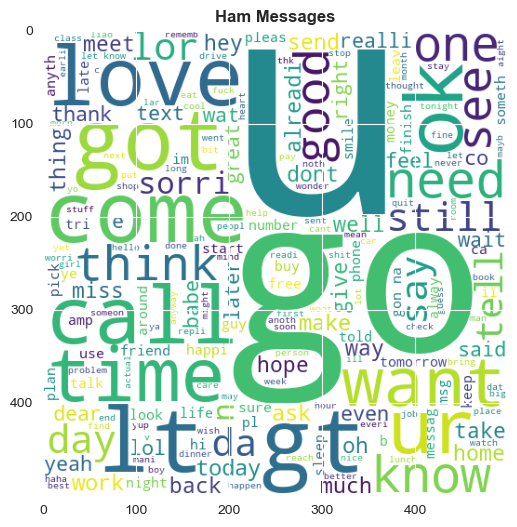

In [136]:
plt.figure(figsize=(6,8))
plt.imshow(ham)
plt.title("Ham Messages",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
2. 💡 The above word cloud has been generated using spam detector file in the dataset. One interesting task might be generating word clouds using other csv files available in the dataset.

3. 💡Advantages of Word Clouds : 

* Analyzing sms spam feedback.
* Identifying new SEO keywords to target.
4. 💡 According to this chart the word of msg is big in font that ismost time repeated.
* ==========================================================================================

In [137]:
spam = wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep=" "))

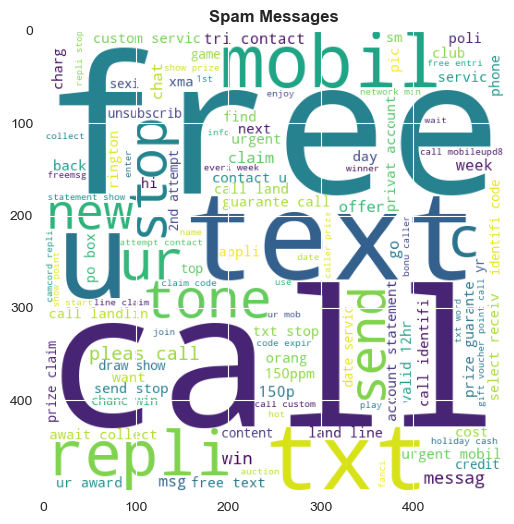

In [138]:
plt.figure(figsize=(8,6))
plt.imshow(spam)
plt.title("Spam Messages",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
2. 💡 The above word cloud has been generated using spam detector file in the dataset. One interesting task might be generating word clouds using other csv files available in the dataset.

3. 💡Advantages of Word Clouds : 

* Analyzing sms spam feedback.
* Identifying new SEO keywords to target.
4. 💡 According to this chart the word of msg is big in font that ismost time repeated.
* ==========================================================================================

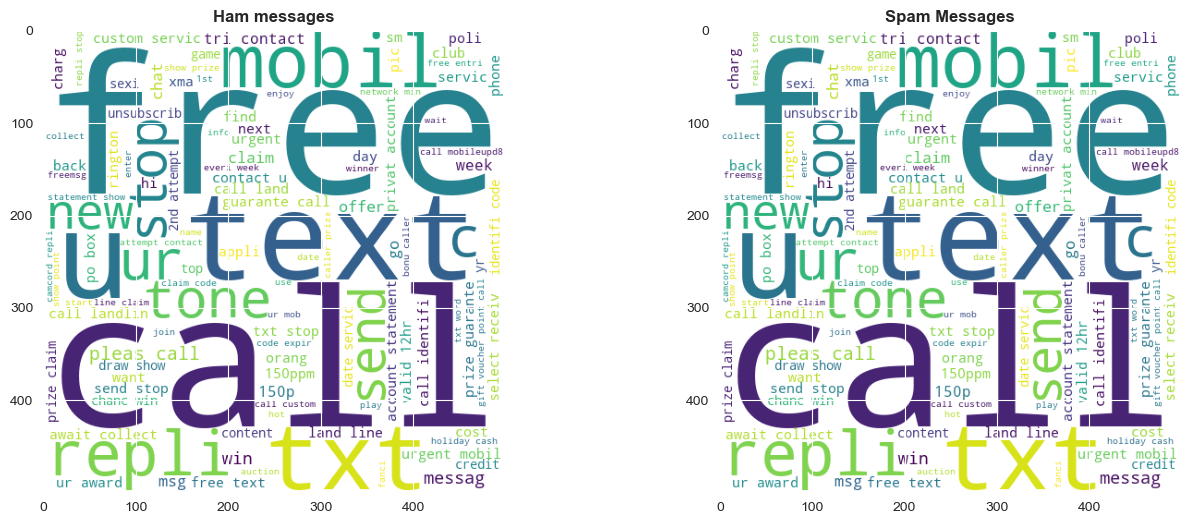

In [139]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(ham)
plt.title("Ham messages",fontweight="bold")
plt.subplot(1,2,2)
plt.imshow(spam)
plt.title("Spam Messages",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
2. 💡 The above word cloud has been generated using spam detector file in the dataset. One interesting task might be generating word clouds using other csv files available in the dataset.

3. 💡Advantages of Word Clouds : 

* Analyzing sms spam feedback.
* Identifying new SEO keywords to target.
4. 💡 According to this chart the word of msg is big in font that ismost time repeated.
* ==========================================================================================

In [140]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
# Finding the Top 30 Ham Word and top 30 Spam Word

In [142]:
from collections import Counter

In [143]:
ham_cor=[]
for msg in df[df["Target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_cor.append(word)
    

In [144]:
len(ham_cor)

35394

In [145]:
x=Counter(ham_cor).most_common(30)

In [146]:
ham_msg = pd.DataFrame(x)

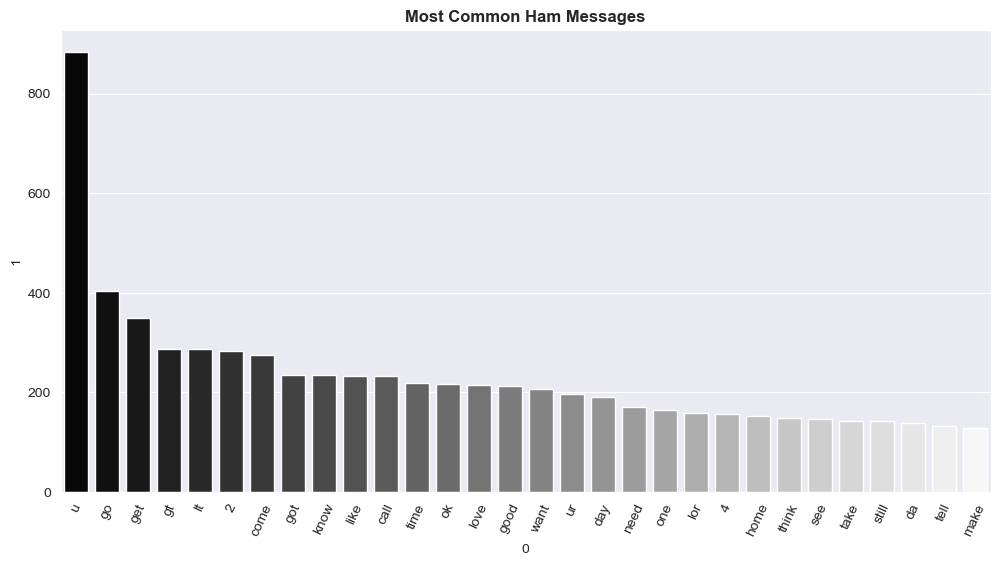

In [216]:
plt.figure(figsize=(12,6)) 
sns.barplot(x=ham_msg[0],y=ham_msg[1],palette="gist_gray")  #palette = "gist_gray",autumn,copper_r,rainbow,coolwarm
plt.xticks(rotation=65)
plt.title("Most Common Ham Messages",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡 With this barplot its show that there is top 30 Most common word that is Ham Message.
2. 💡There is u and go that's the two sentance that is most itme used in Ham messages.
* ==========================================================================================

In [148]:
h=wc.generate(ham_msg[0].str.cat(sep=" "))

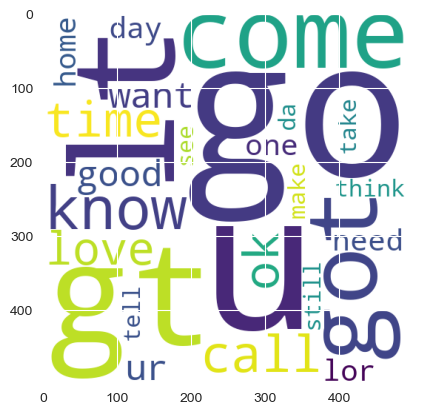

In [149]:
plt.imshow(h);

In [150]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [151]:
spam_cor=[]
for msg in df[df["Target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_cor.append(word)
    

In [152]:
spm = Counter(spam_cor).most_common(30)

In [153]:
spam = pd.DataFrame(spm)

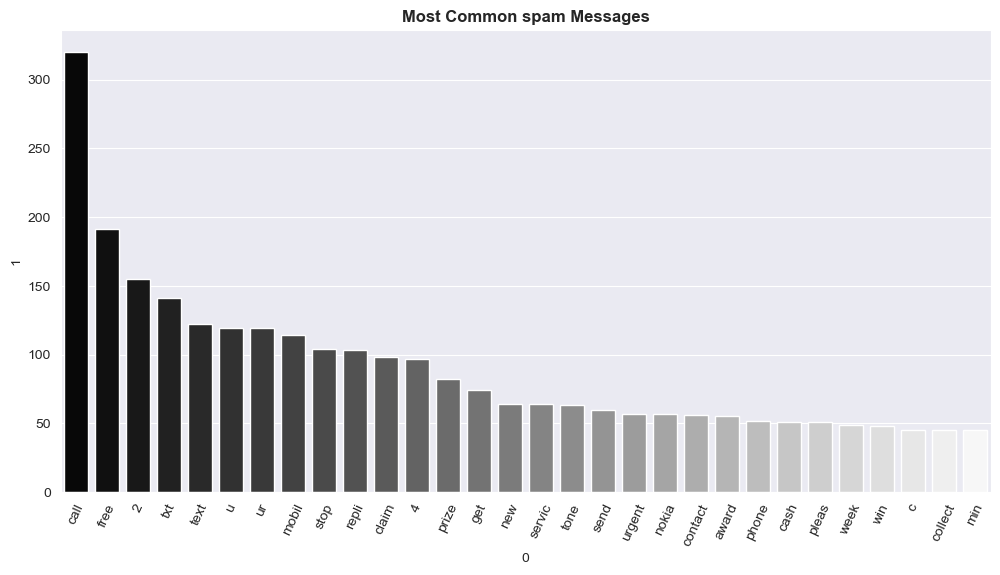

In [215]:
plt.figure(figsize=(12,6))
sns.barplot(x=spam[0],y=spam[1],palette="gist_gray")
plt.xticks(rotation=65)
plt.title("Most Common spam Messages",fontweight="bold")
plt.show()

# $🪶 Insights :-$
* ==========================================================================================
1. 💡 With this barplot its show that there is top 30 Most common word that is Ham Message.
2. 💡There is call and free that's the two sentance that is most itme used in Ham messages.
* ==========================================================================================

In [155]:
sp = wc.generate(spam[0].str.cat(sep=" "))

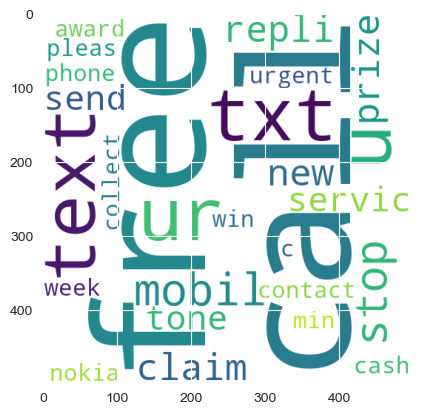

In [156]:
plt.imshow(sp);

In [157]:
df.head()

,Target,Text,No.of Charactor,No.of Words,No.of Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# $ 🪶🪶Model Building$

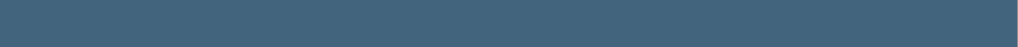

* Text Vectorization
* Using Bag of Words

In [158]:
# With the help of this library i will extract the text counting.
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [229]:
cv=CountVectorizer()
tfdf = TfidfVectorizer(max_features=3000)

In [230]:
x = tfdf.fit_transform(df["transformed_text"]).toarray()

In [161]:
vector = cv.fit_transform(df["transformed_text"]).toarray()

In [162]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
# This is our Features 
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [164]:
vector.shape

(5169, 6708)

In [165]:
# Target of the Dataset
y = df[["Target"]]

In [166]:
# importing the sklearn library
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report

In [167]:
# Splitting the the data form the train and test according to the model.

In [231]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [232]:
print("-"*120)
print(f"The Accuracy of the x_train :- {x_train.shape}")
print("-"*120)
print(f"The Accuracy of the y_train :- {y_train.shape}")
print("-"*120)
print(f"The Accuracy of the x_test :- {x_test.shape}")
print("-"*120)
print(f"The Aaccuracy of the y_test :- {y_test.shape}")
print("-"*120)

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the x_train :- (4135, 3000)
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the y_train :- (4135, 1)
------------------------------------------------------------------------------------------------------------------------
The Accuracy of the x_test :- (1034, 3000)
------------------------------------------------------------------------------------------------------------------------
The Aaccuracy of the y_test :- (1034, 1)
------------------------------------------------------------------------------------------------------------------------


# $🪶 Building Model$
* ==================================================================================

In [170]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [233]:
#mnb.fit(x_train,y_train)

In [172]:
train_ac = []
test_ac = []
pre_ac = []
model_name = []


def Apply_model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    precision = precision_score(y_test,pred)
    test_score = model.score(x_test,y_test)
    train_score = model.score(x_train,y_train)
    cm = confusion_matrix(y_test,pred)
    print("-"*120,"\n")
    print(f"-----Performance of the Machine Learning Model :-  {model}---------------------")
    print("-"*120,"\n")
    print("-"*120)
    print(f"The Accuracy of the test model is :- {test_score}")
    print("-"*120,"\n")
    print(f"The Accuracy of the Train Model is :- {train_score}")
    print("-"*120,"\n")
    print(f"The Accuracy of the precision Score is :- {precision}")
    print("-"*120,"\n")
    print(f" Confusion Matrix :- ")
    print("-"*120,"\n")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True)
    plt.title("Confusion Matrix",fontweight="bold")
    plt.show()
    print("-"*120,"\n")
    print("-"*120)
    print(classification_report(y_test,pred))
    print("-"*120)
    train_ac.append(train_score)
    test_ac.append(test_score)
    pre_ac.append(precision)
    model_name.append(model)

# $$🎡𝐸𝑣𝑎𝑙𝑢𝑡𝑎𝑡𝑖𝑜𝑛🎡🎡$$

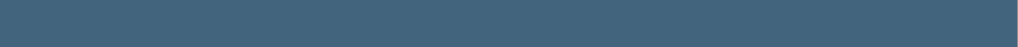

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  MultinomialNB()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9729206963249516
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9796856106408706
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9915966386554622
------------------------------------------------------------------------------------------------------------------------ 

 C

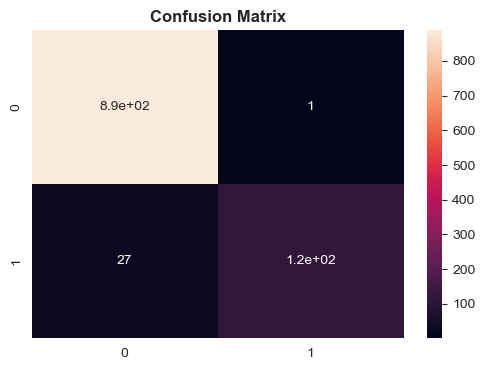

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

------------------------------------------------------------------------------------------------------------------------


In [173]:
Apply_model(mnb)

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  GaussianNB()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.8607350096711799
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.8960096735187424
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.5020746887966805
------------------------------------------------------------------------------------------------------------------------ 

 Conf

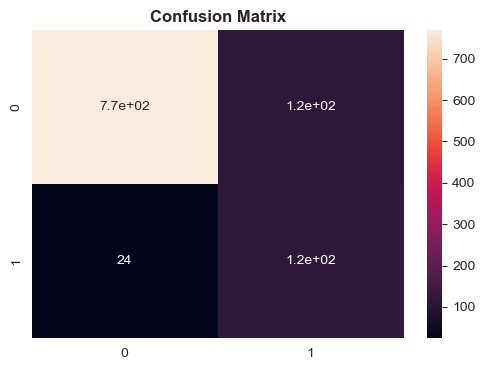

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       889
           1       0.50      0.83      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.90      0.86      0.87      1034

------------------------------------------------------------------------------------------------------------------------


In [174]:
Apply_model(gnb)

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  BernoulliNB()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9729206963249516
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9874244256348247
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9606299212598425
------------------------------------------------------------------------------------------------------------------------ 

 Con

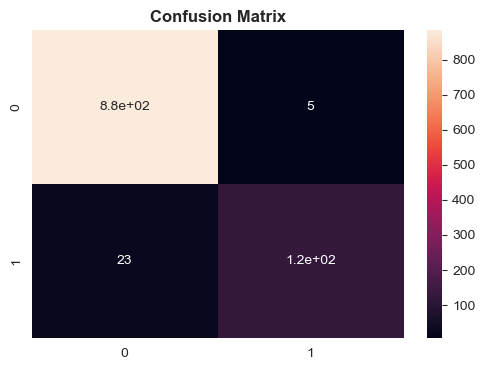

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.96      0.84      0.90       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

------------------------------------------------------------------------------------------------------------------------


In [175]:
Apply_model(bnb)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn = KNeighborsClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  KNeighborsClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9168278529980658
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9274486094316807
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 1.0
------------------------------------------------------------------------------------------------------------------------ 

 Confusion

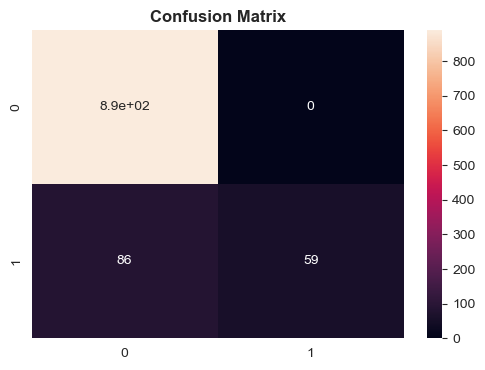

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       889
           1       1.00      0.41      0.58       145

    accuracy                           0.92      1034
   macro avg       0.96      0.70      0.77      1034
weighted avg       0.92      0.92      0.90      1034

------------------------------------------------------------------------------------------------------------------------


In [178]:
Apply_model(knn)

In [179]:
from sklearn.svm import SVC

In [180]:
svc = SVC(kernel="linear")

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  SVC(kernel='linear')---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9825918762088974
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9915356711003628
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9847328244274809
------------------------------------------------------------------------------------------------------------------------

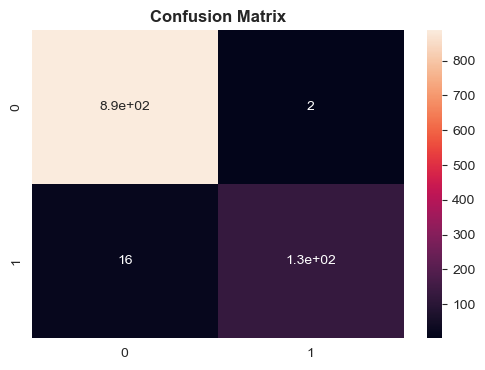

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.89      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

------------------------------------------------------------------------------------------------------------------------


In [181]:
Apply_model(svc)

In [182]:
svp = SVC(kernel="poly")

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  SVC(kernel='poly')---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.925531914893617
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9995163240628778
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 1.0
------------------------------------------------------------------------------------------------------------------------ 

 Confusion Matr

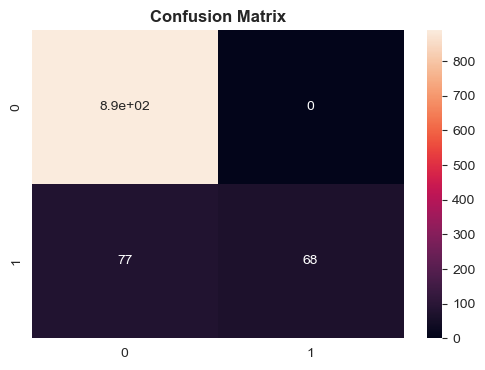

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       889
           1       1.00      0.47      0.64       145

    accuracy                           0.93      1034
   macro avg       0.96      0.73      0.80      1034
weighted avg       0.93      0.93      0.91      1034

------------------------------------------------------------------------------------------------------------------------


In [183]:
Apply_model(svp)

In [184]:
svs = SVC(kernel="sigmoid")

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  SVC(kernel='sigmoid')---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.97678916827853
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9837968561064087
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9548872180451128
------------------------------------------------------------------------------------------------------------------------ 

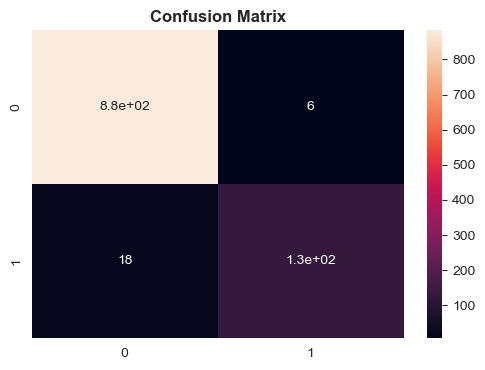

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.88      0.91       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

------------------------------------------------------------------------------------------------------------------------


In [185]:
Apply_model(svs)

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
lr = LogisticRegression()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  LogisticRegression()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9584139264990329
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.965659008464329
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9473684210526315
------------------------------------------------------------------------------------------------------------------------ 

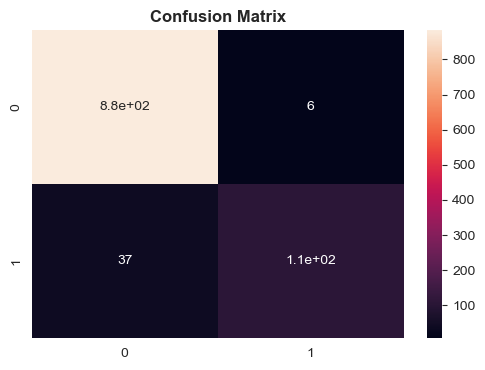

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       889
           1       0.95      0.74      0.83       145

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034

------------------------------------------------------------------------------------------------------------------------


In [188]:
Apply_model(lr)

In [189]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

In [190]:
dtc = DecisionTreeClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  DecisionTreeClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9535783365570599
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9995163240628778
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.825503355704698
---------------------------------------------------------------------------------------------------------------------

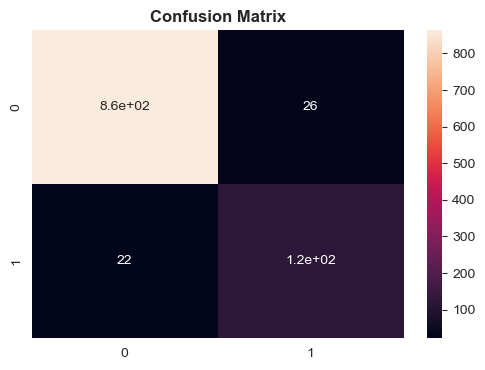

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       889
           1       0.83      0.85      0.84       145

    accuracy                           0.95      1034
   macro avg       0.90      0.91      0.90      1034
weighted avg       0.95      0.95      0.95      1034

------------------------------------------------------------------------------------------------------------------------


In [191]:
Apply_model(dtc)

In [192]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [193]:
rnf = RandomForestClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  RandomForestClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9729206963249516
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9995163240628778
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9834710743801653
--------------------------------------------------------------------------------------------------------------------

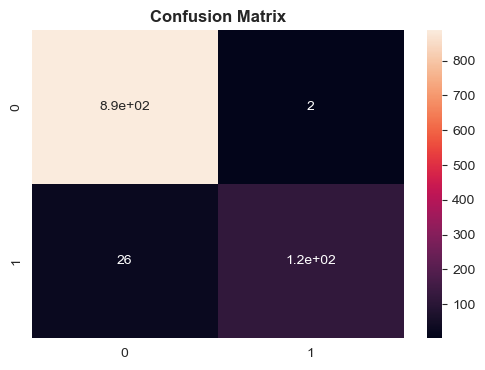

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.98      0.82      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

------------------------------------------------------------------------------------------------------------------------


In [194]:
Apply_model(rnf)

In [195]:
bcf = BaggingClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  BaggingClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9535783365570599
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9961305925030229
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.8489208633093526
------------------------------------------------------------------------------------------------------------------------ 

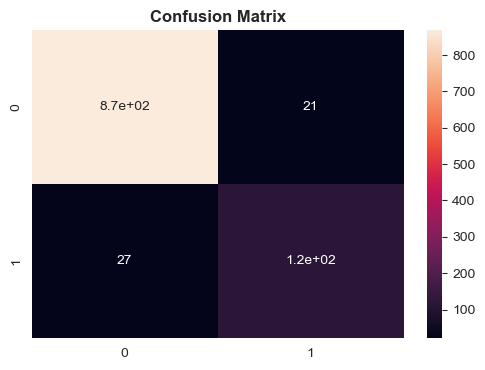

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.85      0.81      0.83       145

    accuracy                           0.95      1034
   macro avg       0.91      0.90      0.90      1034
weighted avg       0.95      0.95      0.95      1034

------------------------------------------------------------------------------------------------------------------------


In [196]:
Apply_model(bcf)

In [197]:
etc = ExtraTreesClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  ExtraTreesClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9748549323017408
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9995163240628778
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9612403100775194
----------------------------------------------------------------------------------------------------------------------

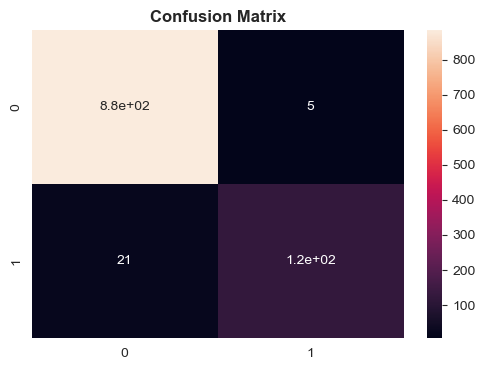

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.86      0.91       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.95      1034
weighted avg       0.97      0.97      0.97      1034

------------------------------------------------------------------------------------------------------------------------


In [198]:
Apply_model(etc)

In [199]:
abc = AdaBoostClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  AdaBoostClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9506769825918762
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9750906892382104
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.8671875
------------------------------------------------------------------------------------------------------------------------ 

 Confu

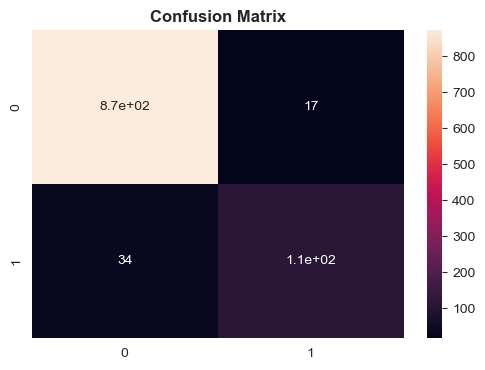

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       889
           1       0.87      0.77      0.81       145

    accuracy                           0.95      1034
   macro avg       0.91      0.87      0.89      1034
weighted avg       0.95      0.95      0.95      1034

------------------------------------------------------------------------------------------------------------------------


In [200]:
Apply_model(abc)

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
gbc = GradientBoostingClassifier()

------------------------------------------------------------------------------------------------------------------------ 

-----Performance of the Machine Learning Model :-  GradientBoostingClassifier()---------------------
------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
The Accuracy of the test model is :- 0.9622823984526112
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the Train Model is :- 0.9775090689238211
------------------------------------------------------------------------------------------------------------------------ 

The Accuracy of the precision Score is :- 0.9649122807017544
----------------------------------------------------------------------------------------------------------------

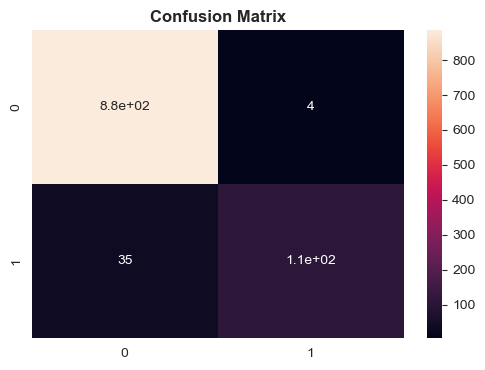

------------------------------------------------------------------------------------------------------------------------ 

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.96      0.76      0.85       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034

------------------------------------------------------------------------------------------------------------------------


In [203]:
Apply_model(gbc)

In [204]:
#from xgboost import XGBClassifier

In [205]:
#xgc = XGBClassifier()

In [206]:
#Apply_model(xgc)

train_ac = []
test_ac = []
pre_ac = []
model_name = []


In [207]:
df_per = pd.DataFrame({"Model_Name":model_name,"Train_Accuracy":train_ac,"Test_Accuracy":test_ac,"Precision_Accuracy":pre_ac})

In [208]:
df_per = df_per.sort_values("Precision_Accuracy",ascending=False)

In [209]:
df_per

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Accuracy
3,KNeighborsClassifier(),0.927449,0.916828,1.000000
5,SVC(kernel='poly'),0.999516,0.925532,1.000000
0,MultinomialNB(),0.979686,0.972921,0.991597
4,SVC(kernel='linear'),0.991536,0.982592,0.984733
9,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999516,0.972921,0.983471
13,([DecisionTreeRegressor(criterion='friedman_ms...,0.977509,0.962282,0.964912
11,"(ExtraTreeClassifier(random_state=299650833), ...",0.999516,0.974855,0.961240
2,BernoulliNB(),0.987424,0.972921,0.960630
6,SVC(kernel='sigmoid'),0.983797,0.976789,0.954887
7,LogisticRegression(),0.965659,0.958414,0.947368


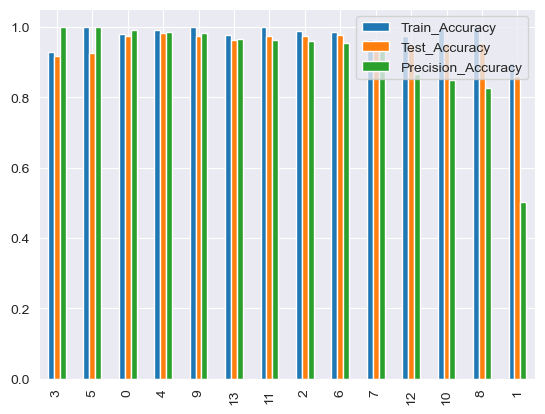

In [210]:
#plt.figure(figsize=(12,5))
df_per.plot(kind="bar");

# $$📨For the Spam 📨classification📧 $$

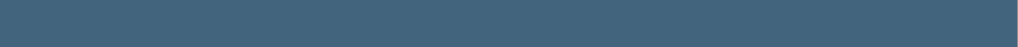
### The Perfect Machine learning Model is 
1. 🪶 MultinomialNB Naive Bayes Machine Learning Algorithm.
2. 🪶 SVC Machine Learning.
3. 🪶 Decision Tree Classifier

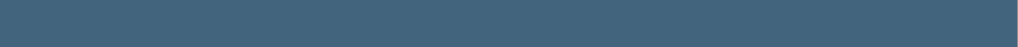

In [218]:
tfdf

TfidfVectorizer(max_features=3000)

In [234]:
mnb=MultinomialNB().fit(x_train,y_train)
print(mnb.score(x_train,y_train))
print(mnb.score(x_test,y_test))
print(precision_score(y_test,mnb.predict(x_test)))

0.9796856106408706
0.9729206963249516
0.9915966386554622


In [235]:
import pickle # iHave used this library to deploye the Machine learning Projects
pickle.dump(tfdf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

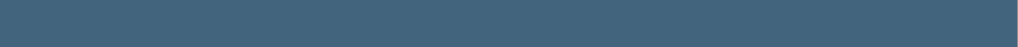

In [211]:
# Melting the Two columns test accuracy and Precision Accuracy
p = pd.melt(df_per,id_vars="Model_Name")
p

,Model_Name,variable,value
0,KNeighborsClassifier(),Train_Accuracy,0.927449
1,SVC(kernel='poly'),Train_Accuracy,0.999516
2,MultinomialNB(),Train_Accuracy,0.979686
3,SVC(kernel='linear'),Train_Accuracy,0.991536
4,"(DecisionTreeClassifier(max_features='sqrt', r...",Train_Accuracy,0.999516
5,([DecisionTreeRegressor(criterion='friedman_ms...,Train_Accuracy,0.977509
6,"(ExtraTreeClassifier(random_state=299650833), ...",Train_Accuracy,0.999516
7,BernoulliNB(),Train_Accuracy,0.987424
8,SVC(kernel='sigmoid'),Train_Accuracy,0.983797
9,LogisticRegression(),Train_Accuracy,0.965659


# $🪶🪶Information$

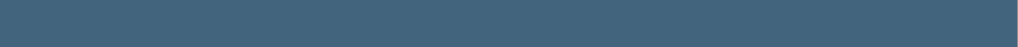

SMS spam, which refers to an unsolicited message sent by a sender without prior relationship to the user mostly for commercial or financial purposes, is still a major problem to all Global System for Mobile communication (GSM) subscribers. This paper critically reviewed the existing SMS spam filters by identifying and analyzing their problems. Some of these problems are adaptability to spammers' concept drift, SMS flooding on the network, overhead during training and testing; memory and computational robustness. Furthermore, a taxonomy for existing SMS Spam filtering techniques was constructed. This paper finally concludes by recommending the use of an adaptive and collaborative SMS spam filtering system.

SMS spam dataset in i have created a machine learning algorithm.That's detect the spam messages correctly.with the help of this machine learning algorithm i will classify the messages which messages is spam and which is Ham.


## $In this Project i have used this things.$
1. 💡machine learning algorithms and preprocessing.
2. 💡NLTK Natural language toolkit
3. 💡from sklearn.feature_extraction in tokenize
4. 💡I have used stamming  to remove the stop word.
5. 💡I have used collection Library to find the top 30 or top 10 spam word and Ham word.
6. 💡After all for visulization in word chart i have used wordcloud library
    with the help of this libarary i can create a word chart.
    from wordcloud import WordCloud
7. 💡And in last of Visulization or EDA i have used countvectorization
    from sklearn.feature_extraction.text import Countvectorization


* with the help of this Library we can remove the stop word  (ex:- is are,he,she,was,have etc....)
* from nltk.corpus import stopwords
* #stopwords.words("english") # you check the stop word
* import string
* #string.punctuation    # its show the all special charactor
* from nltk.stem.porter import PorterStemmer


In [212]:
x=string.punctuation

# $$🏵️🏵️Thanks For watching my Complete Project🌻🌻$$

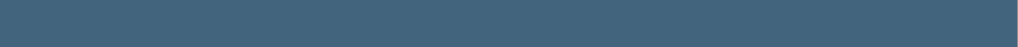

 #  $Thanks.$

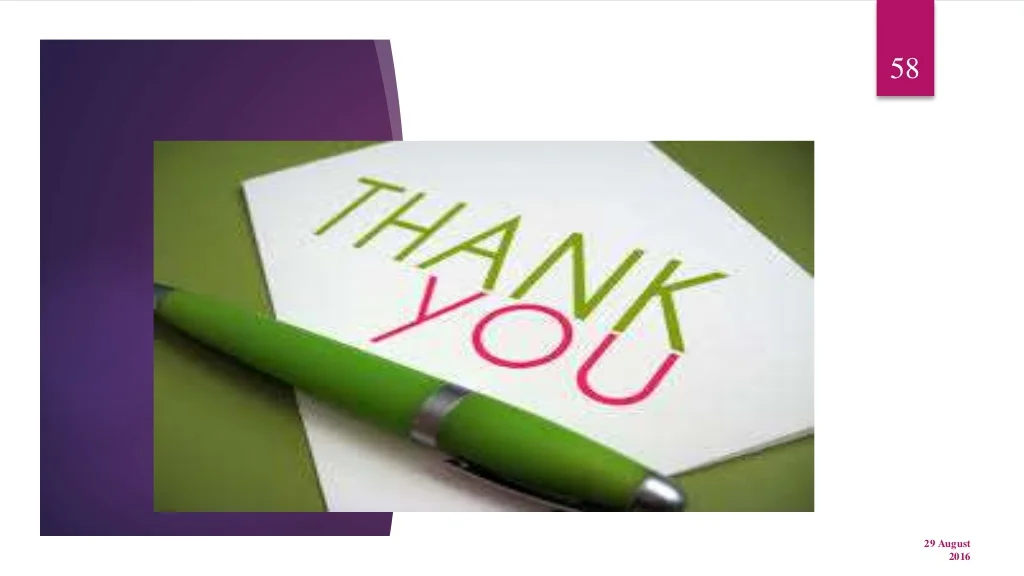

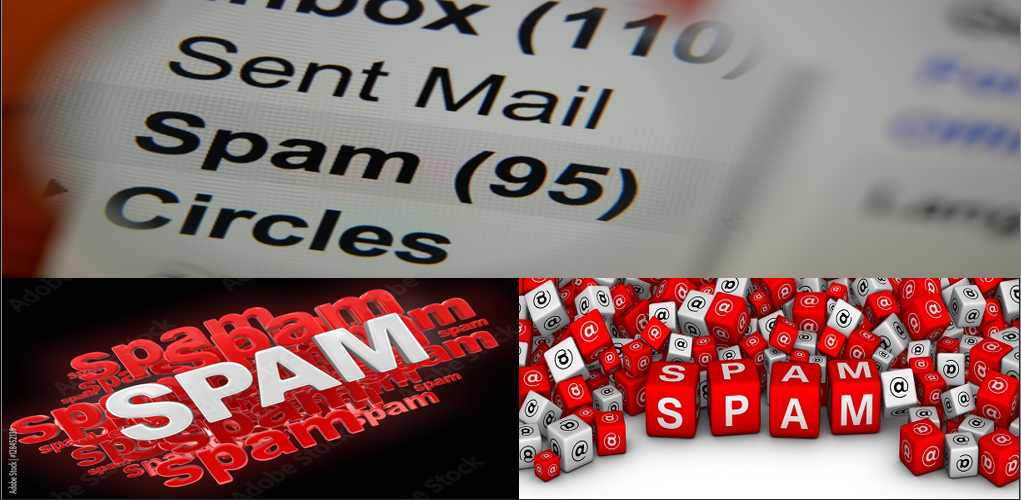